In [75]:
%config Completer.use_jedi = False

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import date

import sklearn.externals
import joblib

In [77]:
df_diabetes = pd.read_csv("scoring/diabetes.csv")
df_patient = pd.read_csv("scoring/patient_data.csv")
df_pregnancies = pd.read_csv("scoring/pregnancies_records.csv")

In [78]:
pregnancies_sum = df_pregnancies.groupby("PatientID", as_index=False).agg({"PregnancyRecordID": "count"})
pregnancies_sum.columns=["PatientID", "PregnanciesCount"]

In [79]:
combined = pd.merge(pd.merge(df_diabetes, df_patient, on="PatientID", how="left"), pregnancies_sum, on="PatientID", how="left")

In [80]:
combined.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,PatientID,BirthYear,city,state,country,PregnanciesCount
0,129,80,0,0,31.2,0.703,18022,1992,Lewiston,Maine,United States,NaN
1,159,64,0,0,27.4,0.294,18024,1981,West Mifflin,Pennsylvania,United States,7.0
2,137,61,0,0,24.2,0.151,18051,1966,Saint George,Utah,United States,6.0
3,113,50,10,85,29.5,0.626,18114,1996,Grand Forks,North Dakota,United States,3.0
4,105,90,0,0,29.6,0.197,18147,1975,Rancho Palos Verdes,California,United States,NaN


In [94]:
combined.rename(columns={"city": "City", "state": "State", "country": "Country"}, inplace=True)

In [81]:
year = date.today().year
print(f"year={year}")
combined['Age']=year-combined['BirthYear']
combined.head()

year=2021


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,PatientID,BirthYear,city,state,country,PregnanciesCount,Age
0,129,80,0,0,31.2,0.703,18022,1992,Lewiston,Maine,United States,NaN,29
1,159,64,0,0,27.4,0.294,18024,1981,West Mifflin,Pennsylvania,United States,7.0,40
2,137,61,0,0,24.2,0.151,18051,1966,Saint George,Utah,United States,6.0,55
3,113,50,10,85,29.5,0.626,18114,1996,Grand Forks,North Dakota,United States,3.0,25
4,105,90,0,0,29.6,0.197,18147,1975,Rancho Palos Verdes,California,United States,NaN,46


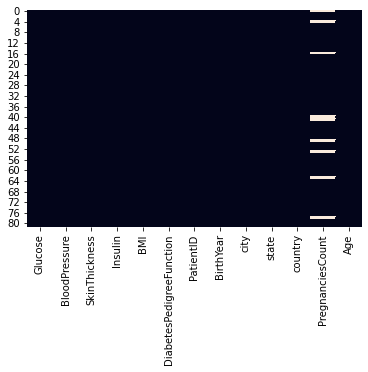

In [82]:
sns.heatmap(combined.isnull(), cbar=False)

In [83]:
combined["PregnanciesCount"].fillna(0, inplace=True)

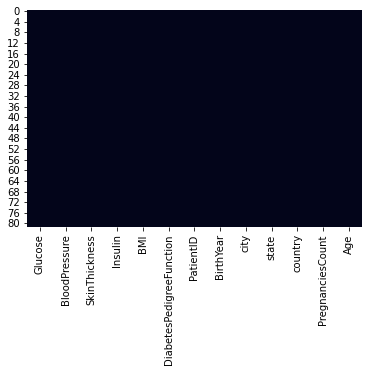

In [84]:
sns.heatmap(combined.isnull(), cbar=False)

In [87]:
#############################
# Load the existing model
#############################
pipeline = joblib.load("models/lr_pipeline_v2.pkl")

In [95]:
predictions = pipeline.predict(combined)

In [96]:
print(predictions)

[0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 1 0 1 0 0 0]
